In [1]:
import pandas
import geopandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_frame(type, path):
    if type == 'pandas':
        dataframe = pandas.read_csv(path)
    else:
        dataframe = geopandas.read_file(path)
    return dataframe

In [3]:
full_join = load_frame('geopandas', 'data_merged/full_join.geojson')

In [4]:
print(full_join.dtypes)

regions                   object
neighborhood              object
light_count                int64
sport_building_count       int64
workplace_count            int64
                          ...   
Vertical Fraud             int64
Waste                      int64
Water                      int64
drug_store_count         float64
geometry                geometry
Length: 80, dtype: object


In [5]:
corr_matrix = full_join.corr()
np.fill_diagonal(corr_matrix.values, np.NaN)
corr_matrix.dropna(how = 'all', inplace = True)

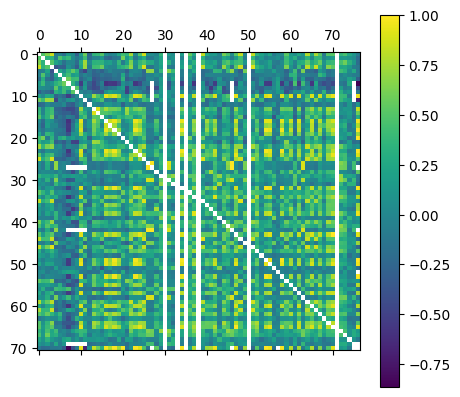

In [6]:
plt.matshow(corr_matrix)
cb = plt.colorbar()
plt.show()

In [7]:
f = open("correlations.txt", "w")
f.write('correlation_coef' + ',' + 'column1'+ ','+ 'column2' + ',' + '\n')
for column in corr_matrix:
    for index, row in corr_matrix.iterrows():
        if row[column] != 1 and row[column] != 0 and row[column] != -1:
            if row[column] > 0.75 or row[column] < -0.75:
                f.write(str(row[column]) + ',' + str(column)+ ','+ str(index) + ',' + '\n')
f.close()